In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy import nan as NA
import re
pd.options.display.max_rows = 10 # limit displayed rows to 10

In [2]:
# Missing Data
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data[0] = None  # add a missing data element using Python 'None'
print(string_data, '\n')
print(string_data.isnull()) # isnull() finds both missing data types

0         None
1    artichoke
2          NaN
3      avocado
dtype: object 

0     True
1    False
2     True
3    False
dtype: bool


<center>Missing Data Methods</center>

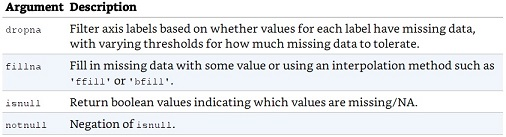

In [3]:
# Removing missing data
data = pd.Series([1, NA, 3.5, NA, 7])
print(data.dropna(), '\n') # equivalent to: data[data.notnull()]

data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], 
                     [NA, NA, NA], [NA, 6.5, 3.]])
print(data, '\n')
cleaned = data.dropna()  # Drop rows containing any 'NA's
print(cleaned, '\n')
print(data.dropna(how = 'all'), '\n') # 'how' arg to drop rows with all NAs

data[4] = NA      # create column containing all 'NA's
print(data, '\n')
print(data.dropna(axis = 1, how = 'all')) # use 'axis' arg to drop columns

# Keep rows or columns containing a specified amount of 'Nan's
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print(df, '\n')
print(df.dropna(), '\n')    # Remove all rows containing at least one 'NaN'
# Use 'thresh' argument to remove rows with 2 or more 'Nan's
print(df.dropna(thresh = 2))

0    1.0
2    3.5
4    7.0
dtype: float64 

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0 

     0    1    2
0  1.0  6.5  3.0 

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0 

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN 

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
          0         1         2
0  0.522802       NaN       NaN
1 -2.679193       NaN       NaN
2 -1.080108       NaN  0.818800
3 -0.752715       NaN -0.026881
4 -0.382773  0.309255 -0.235491
5 -0.605224 -1.768689 -1.023207
6  0.645677  0.386093  0.059832 

          0         1         2
4 -0.382773  0.309255 -0.235491
5 -0.605224 -1.768689 -1.023207
6  0.645677  0.386093  0.059832 

          0         1         2
2 -1.080108       NaN  0.818800
3 -0.752715       NaN -0.026881
4 -0.382773  0.309255 -0.235491
5 -0.605224 -1.768689 -1.023207
6  0.645677  0.386093  

In [4]:
# Fill in missing data
print(df.fillna(0), '\n')  # Replace 'NaN' with '0'
# Use a dict to specify unique replacement values for each column
print(df.fillna({1: 0.5, 2: 0}), '\n') 
# use argument 'inplace=True' if you want to modify the existing DataFrame
_ = df.fillna(0, inplace = True)
print(df, '\n')

df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
print(df, '\n')
print(df.fillna(method = 'ffill'), '\n') # fill in data using interpolation
print(df.fillna(method='ffill', limit=2)) # specify num or rows to replace

print('\nPass mean or Median\n')
data = pd.Series([1., NA, 3.5, NA, 7])
print(data.fillna(data.mean()))  # replace 'Nan' with the mean

          0         1         2
0  0.522802  0.000000  0.000000
1 -2.679193  0.000000  0.000000
2 -1.080108  0.000000  0.818800
3 -0.752715  0.000000 -0.026881
4 -0.382773  0.309255 -0.235491
5 -0.605224 -1.768689 -1.023207
6  0.645677  0.386093  0.059832 

          0         1         2
0  0.522802  0.500000  0.000000
1 -2.679193  0.500000  0.000000
2 -1.080108  0.500000  0.818800
3 -0.752715  0.500000 -0.026881
4 -0.382773  0.309255 -0.235491
5 -0.605224 -1.768689 -1.023207
6  0.645677  0.386093  0.059832 

          0         1         2
0  0.522802  0.000000  0.000000
1 -2.679193  0.000000  0.000000
2 -1.080108  0.000000  0.818800
3 -0.752715  0.000000 -0.026881
4 -0.382773  0.309255 -0.235491
5 -0.605224 -1.768689 -1.023207
6  0.645677  0.386093  0.059832 

          0         1         2
0  0.435854 -0.781150 -0.127340
1  0.758406  1.278956 -0.435896
2 -0.530206       NaN  0.633007
3 -1.029981       NaN -0.226063
4 -0.272073       NaN       NaN
5 -0.479322       NaN       NaN 



<center>fillna arguments</center>
  
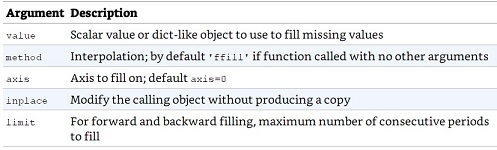    

In [5]:
# Removing Duplicates
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
print(data, '\n')
print(data.duplicated(), '\n') # create boolean maxtrix to find duplicates
print(data.drop_duplicates(), '\n') # use matrix to remove duplicate rows

data['v1'] = range(7)
print(data, '\n')
# drop duplicates using only rows of 'k1' column. 
print(data.drop_duplicates(['k1']), '\n') # by default keep first occurance
# Keep last occurance of observed data and drop based on 'k1' and 'k2' cols
print(data.drop_duplicates(['k1', 'k2'], keep = 'last'))

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4
6  two   4 

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool 

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4 

    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6 

    k1  k2  v1
0  one   1   0
1  two   1   1 

    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
6  two   4   6


In [6]:
# Use Functions or Mapping
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
print(data, '\n')

lowercased = data['food'].str.lower() #create series with lowercase strings
meat_to_animal = {'bacon': 'pig',    # create mapping of meat to animal
                  'pulled pork': 'pig',
                  'pastrami': 'cow',
                  'corned beef': 'cow',
                  'honey ham': 'pig',
                  'nova lox': 'salmon'}

data['animal'] = lowercased.map(meat_to_animal)
print(data, '\n') # map lcase strings with animal type and modify dataframe

# Use a lambda function to do the mapping 
print(data['food'].map(lambda x: meat_to_animal[x.lower()]))

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0 

          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon 

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object


In [7]:
# Advanced 'fillna()' using 'replace()' method
data = pd.Series([1., -999., 2., -999., -1000., 3.])
print(data, '\n')
print(data.replace(-999, np.nan), '\n') # replace '-999' with 'NaN'
# replace multiple values (i.e. '-999' & '-1000') with 'NaN'
print(data.replace([-999, -1000], np.nan), '\n') 
# replace multiple values ('-999', '-1000') with unique values ('NaN', '0')
data.replace([-999, -1000], [np.nan, 0]), '\n' 
# or use a dict to specify replacement values
print(data.replace({-999: np.nan, -1000: 0})) 

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64 

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64 

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64 

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


In [8]:
# Changing Axis labels
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index = ['Ohio', 'Colorado', 'New York'],
                    columns = ['one', 'two', 'three', 'four'])
print(data, '\n')

transform = lambda x: x[:4].upper() # Create a 'transform' function
print(data.index.map(transform), '\n')

data.index  = data.index.map(transform) # apply function to DataFrame
print(data, '\n')

# use 'rename()' if you don't want to modify original DataFrame
print(data.rename(index = str.title, columns = str.upper), '\n')
# Use a dict to rename a subset of labels
print(data.rename(index = {'OHIO': 'INDIANA'},
                  columns = {'three': 'peekaboo'}), '\n')
# Use 'inplace = True' to modify the original DataFrame
data.rename(index = {'OHIO': 'INDIANA'}, inplace = True)
print(data)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11 

Index(['OHIO', 'COLO', 'NEW '], dtype='object') 

      one  two  three  four
OHIO    0    1      2     3
COLO    4    5      6     7
NEW     8    9     10    11 

      ONE  TWO  THREE  FOUR
Ohio    0    1      2     3
Colo    4    5      6     7
New     8    9     10    11 

         one  two  peekaboo  four
INDIANA    0    1         2     3
COLO       4    5         6     7
NEW        8    9        10    11 

         one  two  three  four
INDIANA    0    1      2     3
COLO       4    5      6     7
NEW        8    9     10    11


In [9]:
# Binning data
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100] 
cats = pd.cut(ages, bins)     # create 4 bins using pandas 'cut()' method
print(cats, '\n')
print(cats.codes)                   # bin mapping array
print(cats.categories)              # bin categories
print(pd.value_counts(cats), '\n')  # number of items in each bin

# Note '(' means side is open ']' means side is closed. 
# Change which side is closed with 'right=' argument
print(pd.cut(ages, [18, 26, 36, 61, 100], right = False), '\n')
# Replace bin names using 'labels=' argument
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
print(pd.cut(ages, bins, labels = group_names), '\n')

data = np.random.rand(20)
# cut data into 4 equal bins. Note:'precision=2' means use 2 decimal digits
print(pd.cut(data, 4, precision = 2), '\n') 

# Use 'qcut' to create bins with equal number of data members
data = np.random.randn(1000)
cats = pd.qcut(data, 4)   # Cut into quartiles
print(cats, '\n')
print(pd.value_counts(cats), '\n')
print(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])) # specify custom quantiles

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]] 

[0 0 0 1 0 0 2 1 3 2 2 1]
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64 

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)] 

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior] 

[(0.018, 0.26], (0.51, 0.75], (0.51, 0.75], (0.26, 0.51], (0.51, 0.75], ..., (0.018, 0.26], (0.51, 0.75], (0.018, 0.26], (0.018, 0.26], (0.018, 0.26]]
Length: 20
Categories (4, interval[float64])

In [10]:
# Finding and removing Outliers
data = pd.DataFrame(np.random.randn(1000, 4)) # Normal distribution
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.036682,-0.014526,-0.010777,0.017889
std,1.028124,0.984519,0.981530,0.975665
min,-3.001601,-2.861578,-3.332629,-2.709693
25%,-0.723872,-0.670984,-0.667947,-0.685137
50%,-0.055816,-0.032872,-0.013543,-0.016359
75%,0.678783,0.657783,0.660428,0.631957
max,3.685841,3.245757,3.088902,3.655093


In [11]:
# find values in column 2 exceeding 3 in abs value
col = data[2]
print(col[np.abs(col) > 3], '\n')
# Use 'any()' to find all rows with a value exceeding 3 or -3
print(data[(np.abs(data) > 3).any(1)], '\n')
data[np.abs(data) > 3] = np.sign(data) * 3 # cap values outside -3 to 3
print(data.describe(), '\n')

# 'np.sign()' creats a matrix based on if the values are pos or neg
print(np.sign(data).head())

415   -3.332629
451    3.088902
499   -3.170543
Name: 2, dtype: float64 

            0         1         2         3
115  0.193928 -0.223491 -0.164149  3.420403
281  0.222203 -0.598938 -0.926225  3.552793
408 -0.315151 -0.002514 -2.212455  3.375535
415 -0.084220 -0.119729 -3.332629  0.666225
451 -1.255485  0.807938  3.088902 -1.338998
..        ...       ...       ...       ...
667  3.685841 -0.536600 -1.598525 -0.562764
696  0.153428  3.245757  1.786432 -0.583078
854 -3.001601 -0.116858  0.386088 -0.255687
862  3.541208 -0.599558  0.057310  1.585512
918 -1.791092  3.169012 -0.081481 -1.274414

[12 rows x 4 columns] 

                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.037907    -0.014940    -0.010363     0.015886
std       1.024111     0.983202     0.979646     0.968970
min      -3.000000    -2.861578    -3.000000    -2.709693
25%      -0.723872    -0.670984    -0.667947    -0.685137
50%      -0.055816    -0.

In [12]:
# Random ordering and sampling
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
print(sampler)

print(df, '\n')
print(df.take(sampler), '\n') # 'take()' to use 'iloc' based indexing
print(df.sample(n = 3), '\n') # Select a random subset using 'sample()'
# Select a random sample with replacement by using 'replace=True' argument
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n = 10, replace = True)
print(draws)

[1 2 3 0 4]
    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19 

    0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
0   0   1   2   3
4  16  17  18  19 

    0   1   2   3
3  12  13  14  15
2   8   9  10  11
1   4   5   6   7 

0    5
3    6
4    4
1    7
0    5
0    5
1    7
3    6
3    6
1    7
dtype: int64


In [13]:
# Convert categorical data into Labels or Dummy Variables
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
print(df, '\n')
print(pd.get_dummies(df['key']), '\n') # Create dummy matrix

dummies = pd.get_dummies(df['key'], prefix = 'key') # create a prefix str
df_with_dummy = df[['data1']].join(dummies) # pre-append to labels
print(df_with_dummy, '\n')

# Multiple categories
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep = '::',
                       header = None, names = mnames)
movies[:10]

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5 

   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0 

   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0 



c:\users\gonzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead.
  
c:\users\gonzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [14]:
# Since genres contain multiple categories, we must do more processing
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|')) # '|' = delimiter between categories

genres = pd.unique(all_genres) # Similar to converting to a python set
print(genres, '\n')

# now convert to Dummy variables. First create a zeros matrix
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns = genres)

# Compute number of columns needed to create dummy variables
gen = movies.genres[0]  # Grab a row with max num of categories
print(gen.split('|'))   # Split based on '|' delimiter
# 'get_indexer()' returns indexed list where length is number of categories
print(dummies.columns.get_indexer(gen.split('|')), '\n') 

# Iterate through DataFrame
for i, gen in enumerate(movies.genres):
    indicies = dummies.columns.get_indexer(gen.split('|')) # num of cats
    dummies.iloc[i, indicies] = 1
# Integrage dummy variables into 'movies' matrix
movies_windic = movies.join(dummies.add_prefix('Genre_'))
print(movies_windic.iloc[0])

['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western'] 

['Animation', "Children's", 'Comedy']
[0 1 2] 

movie_id                                      1
title                          Toy Story (1995)
genres              Animation|Children's|Comedy
Genre_Animation                               1
Genre_Children's                              1
                               ...             
Genre_War                                     0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Film-Noir                               0
Genre_Western                                 0
Name: 0, Length: 21, dtype: object


In [15]:
# A possible optimization is to combine 'get_dummies()' with 'cut()'
np.random.seed(12345)
values = np.random.rand(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
print(values, '\n')
pd.get_dummies(pd.cut(values, bins))

[0.92961609 0.31637555 0.18391881 0.20456028 0.56772503 0.5955447
 0.96451452 0.6531771  0.74890664 0.65356987] 



   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

In [16]:
# Pandas String Methods
# Look at PCC 1 for 'String Methods' and PCC 4 for 'Regular Expressions'
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)  # Often data will have missing values
print(data, '\n')
print(data.isnull(), '\n')    # Binary matrix to find missing data

# use '.str.contains()' to find missing data or all addresses with '.gmail'
print(data.str.contains('gmail'), '\n')

# use '.str.findall()' to find missing data and extract address components
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
print(data.str.findall(pattern, flags = re.IGNORECASE))

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object 

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool 

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object 

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object


In [17]:
# Vectorized element retrieval

matches = data.str.findall(pattern, flags = re.IGNORECASE).str[0]
print(matches, '\n')            # Use str attribute
print(matches.str.get(1), '\n') # Use '.str.get()'
print(data.str[:5], '\n')       # Use slicing with str attribute
# create a DataFrame with address components using '.extract()'
print(data.str.extract(pattern,  flags = re.IGNORECASE))

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object 

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object 

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object 

           0       1    2
Dave    dave  google  com
Steve  steve   gmail  com
Rob      rob   gmail  com
Wes      NaN     NaN  NaN


<center>Common pandas String Methods</center>

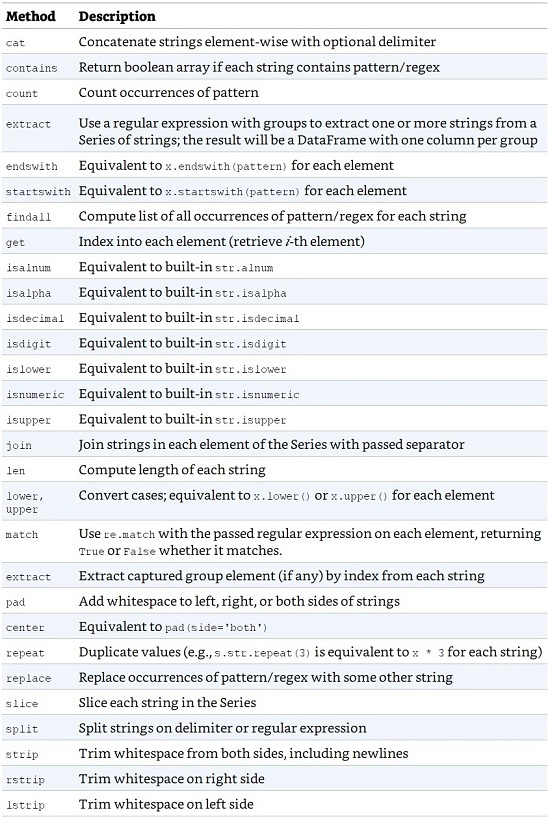